# Pareto Optimization

## Introduction

Pareto Optimization is a fundamental concept in multi-objective optimization where multiple conflicting objectives must be optimized simultaneously. Unlike single-objective optimization, there is typically no single "best" solution, but rather a set of trade-off solutions known as the Pareto optimal set.

This notebook covers:
- What is Pareto Optimization
- Key concepts and definitions
- Step-by-step procedure
- Simple implementations
- Practical examples

## Imports and Setup

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## What is Pareto Optimization?

### Key Definitions

**Pareto Dominance**: Solution A dominates solution B if:
- A is no worse than B in all objectives
- A is strictly better than B in at least one objective

**Pareto Optimal Solution**: A solution that is not dominated by any other solution in the feasible set.

**Pareto Front (Pareto Frontier)**: The set of all Pareto optimal solutions in the objective space.

### When to Use Pareto Optimization

Use Pareto Optimization when:
- You have multiple conflicting objectives (e.g., minimize cost AND maximize quality)
- There is no clear way to combine objectives into a single metric
- You want to explore trade-offs between objectives
- Decision makers need to see multiple solution options

## Procedure for Pareto Optimization

### Step 1: Define the Problem

1. Identify all objectives to optimize (minimize or maximize)
2. Define decision variables
3. Specify constraints (if any)

### Step 2: Generate or Evaluate Solutions

1. Create a set of candidate solutions
2. Evaluate each solution on all objectives

### Step 3: Identify Pareto Dominance

1. Compare each solution with all other solutions
2. Determine which solutions are dominated
3. Mark non-dominated solutions

### Step 4: Extract Pareto Front

1. Collect all non-dominated solutions
2. These form the Pareto optimal set

### Step 5: Visualize and Analyze

1. Plot the Pareto front
2. Analyze trade-offs
3. Support decision making

## Core Algorithm: Checking Pareto Dominance

The fundamental operation is checking if one solution dominates another.

In [20]:
def dominates(solution_a, solution_b, objectives_to_minimize):
    """
    Check if solution_a dominates solution_b.

    Parameters:
    - solution_a: array of objective values for solution A
    - solution_b: array of objective values for solution B
    - objectives_to_minimize: list of booleans indicating which objectives to minimize

    Returns:
    - True if A dominates B, False otherwise
    """
    solution_a = np.array(solution_a)
    solution_b = np.array(solution_b)
    objectives_to_minimize = np.array(objectives_to_minimize)

    # For maximization objectives, flip the comparison
    a_adjusted = np.where(objectives_to_minimize, solution_a, -solution_a)
    b_adjusted = np.where(objectives_to_minimize, solution_b, -solution_b)

    # A dominates B if A is no worse in all objectives and better in at least one
    no_worse = np.all(a_adjusted <= b_adjusted)
    strictly_better = np.any(a_adjusted < b_adjusted)

    return no_worse and strictly_better

### Test the Dominance Function

In [21]:
# Example: Minimize cost, Maximize quality
sol_a = [100, 80]  # cost=100, quality=80
sol_b = [120, 70]  # cost=120, quality=70

objectives_min = [True, False]  # minimize cost, maximize quality

result = dominates(sol_a, sol_b, objectives_min)
print(f"Solution A {sol_a} dominates Solution B {sol_b}: {result}")
print("Explanation: A has lower cost (100 < 120) and higher quality (80 > 70)")

# Test reverse
result2 = dominates(sol_b, sol_a, objectives_min)
print(f"\nSolution B {sol_b} dominates Solution A {sol_a}: {result2}")

Solution A [100, 80] dominates Solution B [120, 70]: True
Explanation: A has lower cost (100 < 120) and higher quality (80 > 70)

Solution B [120, 70] dominates Solution A [100, 80]: False


## Finding the Pareto Front

Given a set of solutions, identify which ones are non-dominated.

In [22]:
def find_pareto_front(solutions, objectives_to_minimize):
    """
    Find the Pareto front from a set of solutions.

    Parameters:
    - solutions: 2D array where each row is a solution with objective values
    - objectives_to_minimize: list of booleans indicating which objectives to minimize

    Returns:
    - pareto_indices: indices of Pareto optimal solutions
    - pareto_solutions: the Pareto optimal solutions
    """
    solutions = np.array(solutions)
    n_solutions = len(solutions)
    is_pareto = np.ones(n_solutions, dtype=bool)

    for i in range(n_solutions):
        if not is_pareto[i]:
            continue

        for j in range(n_solutions):
            if i == j:
                continue

            # If solution j dominates solution i, mark i as not Pareto optimal
            if dominates(solutions[j], solutions[i], objectives_to_minimize):
                is_pareto[i] = False
                break

    pareto_indices = np.where(is_pareto)[0]
    pareto_solutions = solutions[pareto_indices]

    return pareto_indices, pareto_solutions

## Single-Objective vs Multi-Objective Optimization

Now that we have the core algorithms, let's see how Pareto optimization differs from traditional single-objective optimization.

## Motivating Example: Advertising Budget Allocation

A real-world scenario that demonstrates why we need multi-objective optimization.

## Example 1: Simple Two-Objective Problem

Minimize cost and maximize performance.

In [23]:
# Generate sample solutions: [cost, performance]
solutions = np.array(
    [
        [100, 70],  # Solution 0
        [120, 65],  # Solution 1 - dominated
        [80, 75],  # Solution 2
        [90, 80],  # Solution 3
        [110, 72],  # Solution 4 - dominated
        [70, 85],  # Solution 5
        [95, 68],  # Solution 6 - dominated
        [85, 78],  # Solution 7
        [105, 82],  # Solution 8
    ]
)

objectives_min = [True, False]  # minimize cost, maximize performance

# Find Pareto front
pareto_idx, pareto_sols = find_pareto_front(solutions, objectives_min)

print("Pareto Optimal Solutions:")
print(f"Indices: {pareto_idx}")
print("\nObjective values (Cost, Performance):")
for idx in pareto_idx:
    print(
        f"  Solution {idx}: Cost={solutions[idx, 0]}, Performance={solutions[idx, 1]}"
    )

Pareto Optimal Solutions:
Indices: [5]

Objective values (Cost, Performance):
  Solution 5: Cost=70, Performance=85


### Visualize the Pareto Front

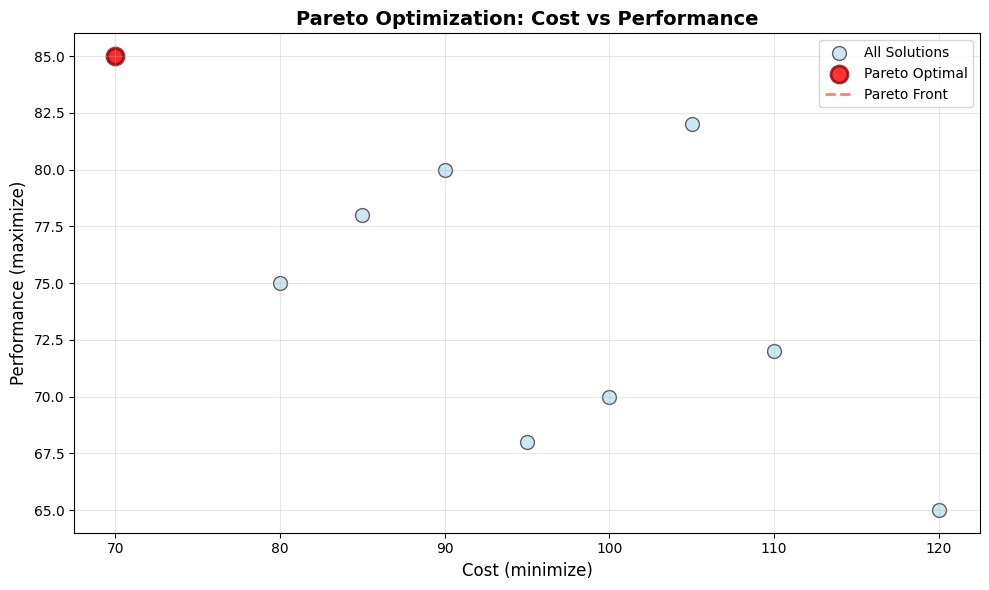

In [24]:
plt.figure(figsize=(10, 6))

# Plot all solutions
plt.scatter(
    solutions[:, 0],
    solutions[:, 1],
    c="lightblue",
    s=100,
    alpha=0.6,
    label="All Solutions",
    edgecolors="black",
)

# Highlight Pareto optimal solutions
plt.scatter(
    pareto_sols[:, 0],
    pareto_sols[:, 1],
    c="red",
    s=150,
    alpha=0.8,
    label="Pareto Optimal",
    edgecolors="darkred",
    linewidths=2,
)

# Connect Pareto front
pareto_sorted = pareto_sols[np.argsort(pareto_sols[:, 0])]
plt.plot(
    pareto_sorted[:, 0],
    pareto_sorted[:, 1],
    "r--",
    alpha=0.5,
    linewidth=2,
    label="Pareto Front",
)

plt.xlabel("Cost (minimize)", fontsize=12)
plt.ylabel("Performance (maximize)", fontsize=12)
plt.title(
    "Pareto Optimization: Cost vs Performance", fontsize=14, fontweight="bold"
)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Example 2: Product Selection Problem

A company needs to select products to manufacture. Each product has:
- Production cost (minimize)
- Expected profit (maximize)
- Market demand satisfaction (maximize)

In [25]:
# Product data: [cost, profit, demand_satisfaction]
products = np.array(
    [
        [50000, 30000, 70],  # Product A
        [60000, 45000, 80],  # Product B
        [40000, 25000, 60],  # Product C
        [70000, 55000, 85],  # Product D
        [55000, 40000, 75],  # Product E
        [45000, 35000, 65],  # Product F
        [65000, 50000, 90],  # Product G
        [48000, 32000, 72],  # Product H
    ]
)

product_names = [
    "Product A",
    "Product B",
    "Product C",
    "Product D",
    "Product E",
    "Product F",
    "Product G",
    "Product H",
]

# Objectives: minimize cost, maximize profit, maximize demand satisfaction
objectives_min = [True, False, False]

pareto_idx, pareto_sols = find_pareto_front(products, objectives_min)

print("Pareto Optimal Products:\n")
results_df = pd.DataFrame(
    {
        "Product": [product_names[i] for i in pareto_idx],
        "Cost": pareto_sols[:, 0],
        "Profit": pareto_sols[:, 1],
        "Demand Satisfaction": pareto_sols[:, 2],
    }
)

print(results_df.to_string(index=False))

Pareto Optimal Products:

  Product  Cost  Profit  Demand Satisfaction
Product B 60000   45000                   80
Product C 40000   25000                   60
Product D 70000   55000                   85
Product E 55000   40000                   75
Product F 45000   35000                   65
Product G 65000   50000                   90
Product H 48000   32000                   72


### Visualize Trade-offs (3D)

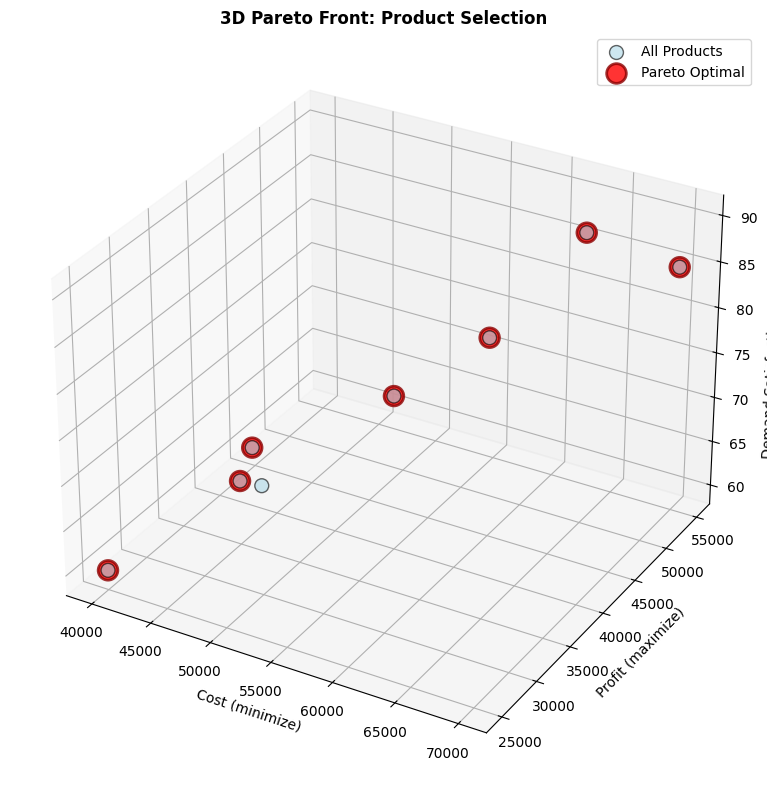

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot all products
ax.scatter(
    products[:, 0],
    products[:, 1],
    products[:, 2],
    c="lightblue",
    s=100,
    alpha=0.6,
    label="All Products",
    edgecolors="black",
)

# Highlight Pareto optimal products
ax.scatter(
    pareto_sols[:, 0],
    pareto_sols[:, 1],
    pareto_sols[:, 2],
    c="red",
    s=200,
    alpha=0.8,
    label="Pareto Optimal",
    edgecolors="darkred",
    linewidths=2,
)

ax.set_xlabel("Cost (minimize)", fontsize=10)
ax.set_ylabel("Profit (maximize)", fontsize=10)
ax.set_zlabel("Demand Satisfaction (maximize)", fontsize=10)
ax.set_title(
    "3D Pareto Front: Product Selection", fontsize=12, fontweight="bold"
)
ax.legend()
plt.tight_layout()
plt.show()

## Example 3: Generating Pareto Front from Functions

Sometimes we have mathematical functions defining the objectives rather than discrete solutions.

In [27]:
def objective1(x):
    """First objective to minimize"""
    return x**2


def objective2(x):
    """Second objective to minimize"""
    return (x - 2) ** 2


# Generate candidate solutions
x_values = np.linspace(-1, 3, 100)
solutions_continuous = np.column_stack(
    [objective1(x_values), objective2(x_values)]
)

# Find Pareto front
objectives_min = [True, True]  # both objectives to minimize
pareto_idx, pareto_sols = find_pareto_front(
    solutions_continuous, objectives_min
)

print(
    f"Number of Pareto optimal solutions: {len(pareto_idx)} out of {len(x_values)}"
)
print(f"\nSample Pareto optimal x values: {x_values[pareto_idx[:5]]}")

Number of Pareto optimal solutions: 50 out of 100

Sample Pareto optimal x values: [0.01010101 0.05050505 0.09090909 0.13131313 0.17171717]


### Visualize Continuous Pareto Front

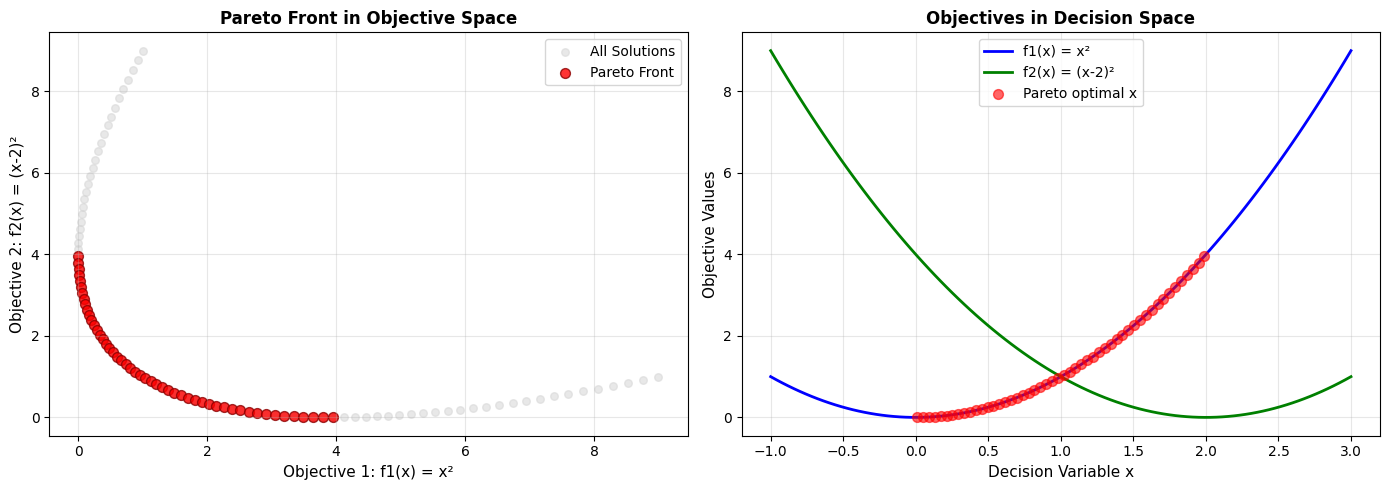

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Objective space
axes[0].scatter(
    solutions_continuous[:, 0],
    solutions_continuous[:, 1],
    c="lightgray",
    s=30,
    alpha=0.5,
    label="All Solutions",
)
axes[0].scatter(
    pareto_sols[:, 0],
    pareto_sols[:, 1],
    c="red",
    s=50,
    alpha=0.8,
    label="Pareto Front",
    edgecolors="darkred",
)
axes[0].set_xlabel("Objective 1: f1(x) = x²", fontsize=11)
axes[0].set_ylabel("Objective 2: f2(x) = (x-2)²", fontsize=11)
axes[0].set_title(
    "Pareto Front in Objective Space", fontsize=12, fontweight="bold"
)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Decision space
axes[1].plot(
    x_values, objective1(x_values), "b-", label="f1(x) = x²", linewidth=2
)
axes[1].plot(
    x_values, objective2(x_values), "g-", label="f2(x) = (x-2)²", linewidth=2
)
axes[1].scatter(
    x_values[pareto_idx],
    objective1(x_values[pareto_idx]),
    c="red",
    s=50,
    alpha=0.6,
    zorder=5,
    label="Pareto optimal x",
)
axes[1].set_xlabel("Decision Variable x", fontsize=11)
axes[1].set_ylabel("Objective Values", fontsize=11)
axes[1].set_title(
    "Objectives in Decision Space", fontsize=12, fontweight="bold"
)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Ranking Non-Pareto Solutions

Sometimes we want to rank all solutions by how many others dominate them.

In [29]:
def pareto_ranking(solutions, objectives_to_minimize):
    """
    Rank solutions by Pareto fronts (layers).

    Returns:
    - ranks: array where rank[i] indicates the Pareto layer (0 is best)
    """
    solutions = np.array(solutions)
    n_solutions = len(solutions)
    ranks = np.zeros(n_solutions, dtype=int)
    remaining = list(range(n_solutions))
    current_rank = 0

    while remaining:
        # Find Pareto front among remaining solutions
        remaining_solutions = solutions[remaining]
        pareto_idx, _ = find_pareto_front(
            remaining_solutions, objectives_to_minimize
        )

        # Assign current rank to these solutions
        for local_idx in pareto_idx:
            global_idx = remaining[local_idx]
            ranks[global_idx] = current_rank

        # Remove these from remaining
        remaining = [
            remaining[i] for i in range(len(remaining)) if i not in pareto_idx
        ]
        current_rank += 1

    return ranks

### Apply Ranking to Product Example

In [30]:
# Redefine objectives for the product example
objectives_min_products = [
    True,
    False,
    False,
]  # minimize cost, maximize profit, maximize demand

ranks = pareto_ranking(products, objectives_min_products)

ranked_df = pd.DataFrame(
    {
        "Product": product_names,
        "Cost": products[:, 0],
        "Profit": products[:, 1],
        "Demand Satisfaction": products[:, 2],
        "Pareto Rank": ranks,
    }
)

ranked_df = ranked_df.sort_values("Pareto Rank")
print("Products Ranked by Pareto Layers:\n")
print(ranked_df.to_string(index=False))
print("\nRank 0 = Best (Pareto Front)")
print("Higher ranks = More dominated solutions")

Products Ranked by Pareto Layers:

  Product  Cost  Profit  Demand Satisfaction  Pareto Rank
Product B 60000   45000                   80            0
Product C 40000   25000                   60            0
Product D 70000   55000                   85            0
Product E 55000   40000                   75            0
Product G 65000   50000                   90            0
Product F 45000   35000                   65            0
Product H 48000   32000                   72            0
Product A 50000   30000                   70            1

Rank 0 = Best (Pareto Front)
Higher ranks = More dominated solutions


## Practical Application: Resource Allocation

Allocate budget across projects to minimize risk and maximize return.

In [31]:
# Different allocation strategies: [risk_score, expected_return]
allocations = np.array(
    [
        [25, 8],  # Conservative
        [35, 12],
        [45, 15],
        [50, 18],
        [60, 20],  # Moderate
        [70, 22],
        [75, 25],
        [85, 27],  # Aggressive
        [90, 28],
        [40, 16],  # Mixed strategies
        [55, 21],
        [65, 23],
        [80, 26],
    ]
)

allocation_names = [f"Strategy {i + 1}" for i in range(len(allocations))]

# Minimize risk, maximize return
objectives_min = [True, False]

pareto_idx, pareto_sols = find_pareto_front(allocations, objectives_min)

print("Pareto Optimal Allocation Strategies:\n")
pareto_df = pd.DataFrame(
    {
        "Strategy": [allocation_names[i] for i in pareto_idx],
        "Risk Score": pareto_sols[:, 0],
        "Expected Return (%)": pareto_sols[:, 1],
    }
)

print(pareto_df.to_string(index=False))

Pareto Optimal Allocation Strategies:

   Strategy  Risk Score  Expected Return (%)
 Strategy 1          25                    8
 Strategy 2          35                   12
 Strategy 4          50                   18
 Strategy 7          75                   25
 Strategy 8          85                   27
 Strategy 9          90                   28
Strategy 10          40                   16
Strategy 11          55                   21
Strategy 12          65                   23
Strategy 13          80                   26


### Visualize Risk-Return Trade-off

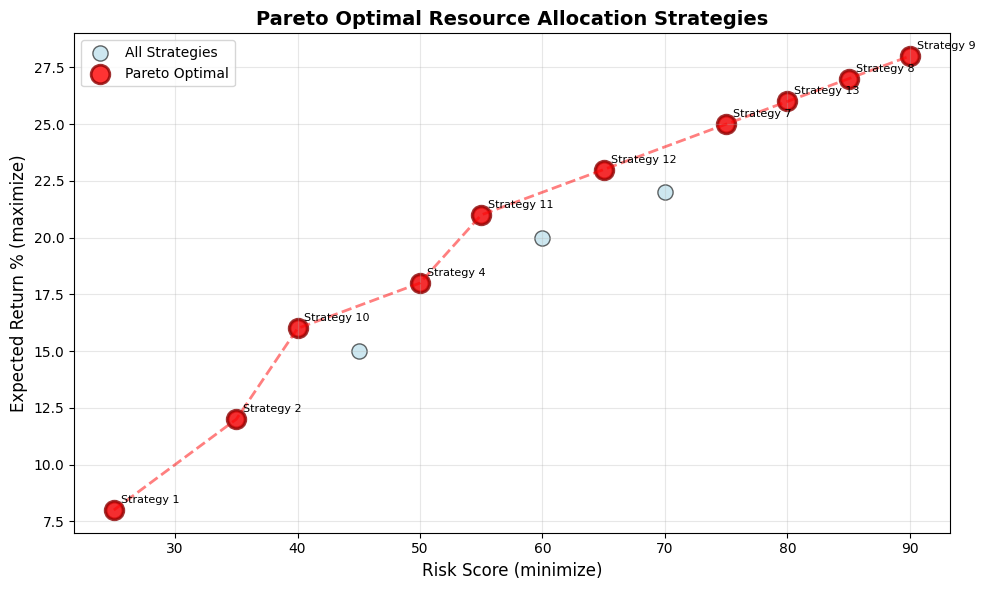

In [32]:
plt.figure(figsize=(10, 6))

# Plot all allocations
plt.scatter(
    allocations[:, 0],
    allocations[:, 1],
    c="lightblue",
    s=120,
    alpha=0.6,
    label="All Strategies",
    edgecolors="black",
)

# Highlight Pareto optimal
plt.scatter(
    pareto_sols[:, 0],
    pareto_sols[:, 1],
    c="red",
    s=180,
    alpha=0.8,
    label="Pareto Optimal",
    edgecolors="darkred",
    linewidths=2,
)

# Connect Pareto front
pareto_sorted = pareto_sols[np.argsort(pareto_sols[:, 0])]
plt.plot(
    pareto_sorted[:, 0], pareto_sorted[:, 1], "r--", alpha=0.5, linewidth=2
)

# Annotate Pareto solutions
for idx in pareto_idx:
    plt.annotate(
        allocation_names[idx],
        (allocations[idx, 0], allocations[idx, 1]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=8,
    )

plt.xlabel("Risk Score (minimize)", fontsize=12)
plt.ylabel("Expected Return % (maximize)", fontsize=12)
plt.title(
    "Pareto Optimal Resource Allocation Strategies",
    fontsize=14,
    fontweight="bold",
)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary of the Pareto Optimization Procedure

### Algorithm Steps

1. **Input Setup**
   - Define objectives and whether to minimize or maximize each
   - Collect or generate candidate solutions
   - Evaluate each solution on all objectives

2. **Dominance Check**
   - For each pair of solutions, check dominance relationship
   - Solution A dominates B if A is better in at least one objective and no worse in all others

3. **Identify Pareto Front**
   - Mark solutions that are not dominated by any other solution
   - These form the Pareto optimal set

4. **Optional: Ranking**
   - Rank remaining solutions by Pareto layers
   - Remove first front, find next front, repeat

5. **Visualization and Analysis**
   - Plot solutions in objective space
   - Highlight Pareto front
   - Analyze trade-offs between objectives

### Key Takeaways

- Pareto optimization finds multiple optimal solutions instead of a single best solution
- Decision makers can choose from the Pareto front based on preferences
- The Pareto front shows the best possible trade-offs between objectives
- All solutions on the Pareto front are equally valid from an optimization perspective

### Problem Statement

A business advertises through two channels:

**Traditional Media:**
- Cost: Php 200,000 per campaign
- Generates: 2 new customers per month
- Generates: 1 positive rating per month

**Personal Appearances:**
- Cost: Php 50,000 per appearance
- Generates: 2 new customers per month
- Generates: 5 positive ratings per month

**Requirements:**
- At least 16 new customers per month
- At least 28 positive ratings per month

**Objective:** Minimize advertising costs

**Single Objective Optimization**

**Goal:** Minimize advertising costs

**Formulation:**

Let:
- $x_1$ = number of traditional media campaigns
- $x_2$ = number of personal appearances

Minimize: $Z = 200000x_1 + 50000x_2$

Subject to:
$$
\begin{align}
2x_1 + 2x_2 &\geq 16 \quad \text{(Customers)} \\
x_1 + 5x_2 &\geq 28 \quad \text{(Ratings)} \\
x_1, x_2 &\geq 0
\end{align}
$$

### Single-Objective Solution: Minimize Cost Only

In [40]:
# Use scipy.optimize.linprog to solve single-objective problem
from scipy.optimize import linprog

# Define the problem parameters
cost_traditional = 200000  # Php per campaign
cost_personal = 50000  # Php per appearance

customers_traditional = 2  # per campaign
customers_personal = 2  # per appearance

ratings_traditional = 1  # per campaign
ratings_personal = 5  # per appearance

# Time requirements (in hours or days)
time_traditional = 1  # 1 time unit per traditional campaign
time_personal = 2  # 2 time units per personal appearance (more involvement)

min_customers = 16
min_ratings = 28

# Objective: Minimize cost = 200000*x1 + 50000*x2
c = [cost_traditional, cost_personal]

# Inequality constraints: -A_ub @ x <= -b_ub
# Constraint 1: 2*x1 + 2*x2 >= 16  =>  -2*x1 - 2*x2 <= -16
# Constraint 2: 1*x1 + 5*x2 >= 28  =>  -1*x1 - 5*x2 <= -28
A_ub = [
    [-customers_traditional, -customers_personal],  # customers constraint
    [-ratings_traditional, -ratings_personal],  # ratings constraint
]
b_ub = [-min_customers, -min_ratings]

# Bounds: x1 >= 0, x2 >= 0
bounds = [(0, None), (0, None)]

# Solve the linear program
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

if result.success:
    x1_opt, x2_opt = result.x
    optimal_cost = result.fun
    optimal_time = x1_opt * time_traditional + x2_opt * time_personal

    print(
        "Single-Objective Solution (Minimize Cost Only):"
    )
    print(f"  Traditional campaigns (x₁): {x1_opt:.2f}")
    print(f"  Personal appearances (x₂): {x2_opt:.2f}")
    print(f"  Total Cost: Php {optimal_cost:,.2f}")
    print(f"  Total Time: {optimal_time:.2f} time units")
    print(f"\nProblem: {optimal_time:.2f} time units means")
    print("executives spend significant time at events, potentially requiring")
    print("hiring another executive - hardly minimizing total cost!")
else:
    print("Linear programming failed to find a solution")

# Also generate discrete solutions for visualization and Pareto analysis
max_traditional = 20
max_personal = 20
advertising_solutions = []
solution_descriptions = []

for t in range(max_traditional + 1):
    for p in range(max_personal + 1):
        total_customers = t * customers_traditional + p * customers_personal
        total_ratings = t * ratings_traditional + p * ratings_personal

        if total_customers >= min_customers and total_ratings >= min_ratings:
            total_cost = t * cost_traditional + p * cost_personal
            total_time = t * time_traditional + p * time_personal

            advertising_solutions.append([total_cost, total_time])
            solution_descriptions.append(f"{t} traditional, {p} personal")

advertising_solutions = np.array(advertising_solutions)

# Store LP solution for visualization
lp_solution = np.array([optimal_cost, optimal_time])

Single-Objective Solution (Minimize Cost Only):
  Traditional campaigns (x₁): 0.00
  Personal appearances (x₂): 8.00
  Total Cost: Php 400,000.00
  Total Time: 16.00 time units

Problem: 16.00 time units means
executives spend significant time at events, potentially requiring
hiring another executive - hardly minimizing total cost!


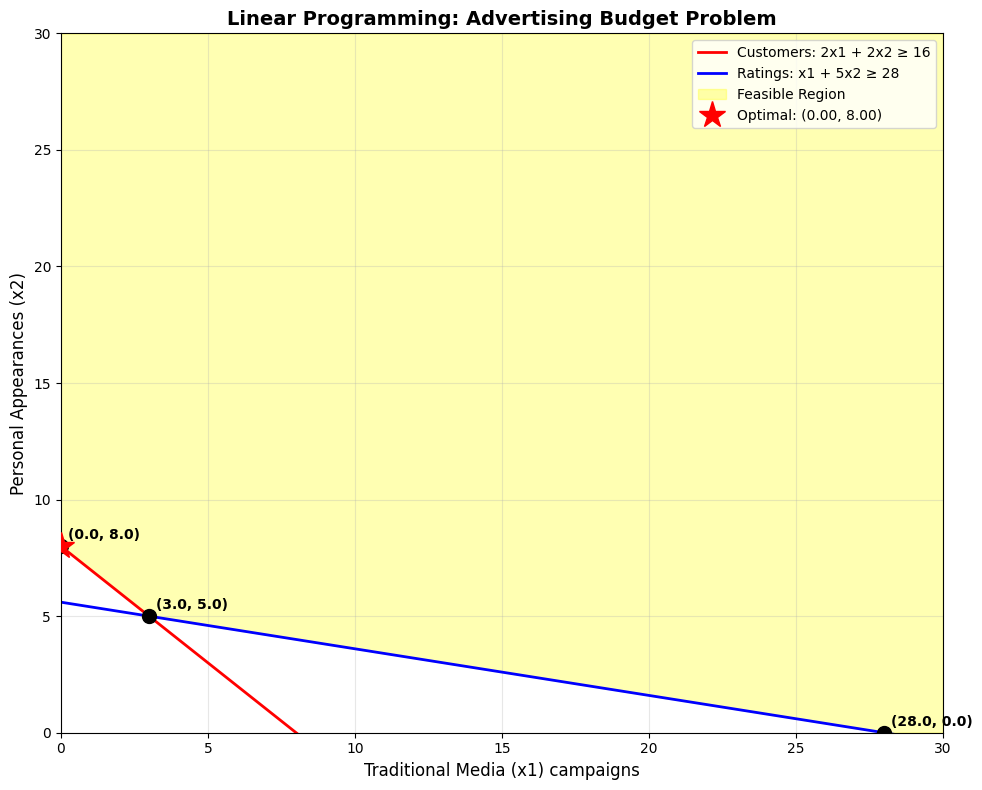

In [42]:
def plot_advertising_problem():
    fig, ax = plt.subplots(figsize=(10, 8))

    x1 = np.linspace(0, 30, 300)

    # Constraint lines (rearranged to x2 = ...)
    customers = (16 - 2 * x1) / 2  # 2x1 + 2x2 >= 16
    ratings = (28 - x1) / 5  # x1 + 5x2 >= 28

    ax.plot(
        x1, customers, "r-", label="Customers: 2x1 + 2x2 ≥ 16", linewidth=2
    )
    ax.plot(x1, ratings, "b-", label="Ratings: x1 + 5x2 ≥ 28", linewidth=2)

    # Feasible region (above all constraint lines)
    x1_fill = np.linspace(0, 30, 300)
    customers_fill = (16 - 2 * x1_fill) / 2
    ratings_fill = (28 - x1_fill) / 5

    # Upper bound of feasible region
    y_upper = np.maximum(customers_fill, ratings_fill)
    y_upper = np.maximum(0, y_upper)

    # Fill feasible region
    ax.fill_between(
        x1_fill,
        y_upper,
        30,
        alpha=0.3,
        color="yellow",
        label="Feasible Region",
    )

    # Find and plot corner points
    corners = []

    # Intersection of two constraints: 2x1 + 2x2 = 16 and x1 + 5x2 = 28
    A = np.array([[2, 2], [1, 5]])
    b = np.array([16, 28])
    corner = np.linalg.solve(A, b)
    if corner[0] >= 0 and corner[1] >= 0:
        corners.append(corner)

    # Intercepts with axes
    corners.append([0, max(16 / 2, 28 / 5)])  # x1=0
    corners.append([max(16 / 2, 28), 0])  # x2=0

    # Plot corner points
    for corner in corners:
        if corner[0] <= 30 and corner[1] <= 15:
            ax.plot(corner[0], corner[1], "ko", markersize=10)
            ax.annotate(
                f"({corner[0]:.1f}, {corner[1]:.1f})",
                xy=(corner[0], corner[1]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=10,
                fontweight="bold",
            )

    # Plot optimal solution
    ax.plot(
        result.x[0],
        result.x[1],
        "r*",
        markersize=20,
        label=f"Optimal: ({result.x[0]:.2f}, {result.x[1]:.2f})",
        zorder=5,
    )

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_xlabel("Traditional Media (x1) campaigns", fontsize=12)
    ax.set_ylabel("Personal Appearances (x2)", fontsize=12)
    ax.set_title(
        "Linear Programming: Advertising Budget Problem",
        fontsize=14,
        fontweight="bold",
    )
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    return fig


plot_advertising_problem()
plt.show()

### Multi-Objective Solution: Consider Both Cost AND Time

This is a classic case for Pareto optimization with two objectives:

**Objective 1:** Minimize cost = 200,000x₁ + 50,000x₂

**Objective 2:** Minimize time = x₁ + 2x₂

Where:
- x₁ = number of traditional media campaigns
- x₂ = number of personal appearances

In [41]:
# Multi-objective approach: minimize cost AND executive time
objectives_min_advertising = [True, True]  # minimize both objectives

pareto_idx_adv, pareto_sols_adv = find_pareto_front(
    advertising_solutions, objectives_min_advertising
)

print("Pareto Optimal Advertising Strategies:\n")
print(f"{'Strategy':<25} {'Cost (Php)':<15} {'Executive Time'}")
print("-" * 55)
for i, idx in enumerate(pareto_idx_adv):
    print(
        f"{solution_descriptions[idx]:<25} {advertising_solutions[idx, 0]:>12,.0f}   {advertising_solutions[idx, 1]:>14.0f}"
    )

print(f"\nFound {len(pareto_idx_adv)} Pareto optimal strategies")
print(
    "Decision makers can now choose based on their preferences for cost vs. time"
)

Pareto Optimal Advertising Strategies:

Strategy                  Cost (Php)      Executive Time
-------------------------------------------------------
0 traditional, 8 personal      400,000               16
1 traditional, 7 personal      550,000               15
2 traditional, 6 personal      700,000               14
3 traditional, 5 personal      850,000               13

Found 4 Pareto optimal strategies
Decision makers can now choose based on their preferences for cost vs. time


### Visualize the Trade-offs

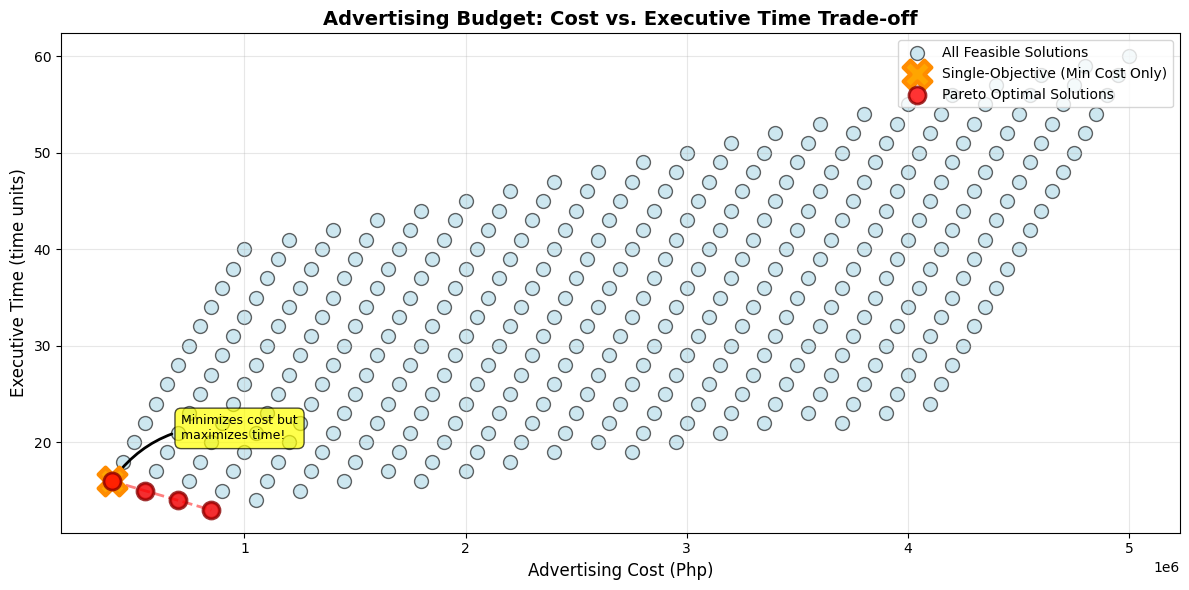

In [38]:
plt.figure(figsize=(12, 6))

# Plot all feasible solutions
plt.scatter(
    advertising_solutions[:, 0],
    advertising_solutions[:, 1],
    c="lightblue",
    s=100,
    alpha=0.6,
    edgecolors="black",
    label="All Feasible Solutions",
)

# Highlight single-objective LP solution
plt.scatter(
    lp_solution[0],
    lp_solution[1],
    c="orange",
    s=400,
    marker="X",
    edgecolors="darkorange",
    linewidths=3,
    label="LP Solution (Min Cost Only)",
    zorder=5,
)

# Highlight Pareto front
plt.scatter(
    pareto_sols_adv[:, 0],
    pareto_sols_adv[:, 1],
    c="red",
    s=150,
    alpha=0.8,
    edgecolors="darkred",
    linewidths=2,
    label="Pareto Optimal Solutions",
    zorder=5,
)

# Connect Pareto front
pareto_sorted_adv = pareto_sols_adv[np.argsort(pareto_sols_adv[:, 0])]
plt.plot(
    pareto_sorted_adv[:, 0],
    pareto_sorted_adv[:, 1],
    "r--",
    alpha=0.5,
    linewidth=2,
)

# Annotate the single-objective solution
plt.annotate(
    "Minimizes cost but\nmaximizes time!",
    xy=(
        advertising_solutions[min_cost_idx, 0],
        advertising_solutions[min_cost_idx, 1],
    ),
    xytext=(50, 30),
    textcoords="offset points",
    fontsize=9,
    ha="left",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.7),
    arrowprops=dict(
        arrowstyle="->", connectionstyle="arc3,rad=0.3", color="black", lw=2
    ),
)

plt.xlabel("Advertising Cost (Php)", fontsize=12)
plt.ylabel("Executive Time (time units)", fontsize=12)
plt.title(
    "Advertising Budget: Cost vs. Executive Time Trade-off",
    fontsize=14,
    fontweight="bold",
)
plt.legend(fontsize=10, loc="upper right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Key Insight

This scenario demonstrates **multiobjective optimization**:

When minimizing cost alone (single-objective), the solution recommends skipping traditional advertising and making many personal appearances. However, this creates a hidden cost: executives spend excessive time at appearances, potentially requiring additional hires.

By using Pareto optimization with multiple objectives (minimize cost AND minimize executive time), we discover a range of optimal trade-off solutions. Decision makers can then choose based on:
- Current executive workload
- Availability for personal appearances
- Budget constraints
- Long-term strategic goals

This is why multiobjective optimization is essential in real-world decision making.